# Compare NLP Techniques: Build A Basic RNN

### Read In Cleaned Text

In [1]:
# Load the cleaned training and test sets
from keras.preprocessing.text import Tokenizer

In [6]:
from keras.utils import pad_sequences

In [12]:


import pandas as pd

X_train = pd.read_csv('../../../data/X_train.csv')
X_test = pd.read_csv('../../../data/X_test.csv')
y_train = pd.read_csv('../../../data/y_train.csv')
y_test = pd.read_csv('../../../data/y_test.csv')

### Prep Data

In [13]:
# Train the tokenizer and use that tokenizer to convert the sentences to sequences of numbers
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train['clean_text'])
X_train_seq = tokenizer.texts_to_sequences(X_train['clean_text'])
X_test_seq = tokenizer.texts_to_sequences(X_test['clean_text'])

In [14]:
X_train_seq

[[5,
  694,
  1788,
  448,
  28,
  3,
  3625,
  3626,
  695,
  12,
  95,
  449,
  1,
  49,
  29,
  605,
  3,
  1451,
  3627,
  275],
 [473, 2349, 3628, 3629, 504, 345, 418, 2350, 450, 537],
 [3630, 56, 28, 841],
 [45,
  2351,
  2352,
  128,
  1242,
  317,
  52,
  2353,
  40,
  8,
  451,
  2354,
  2355,
  2356,
  6,
  2357],
 [23, 2358, 1, 246],
 [44, 122, 242, 115, 20, 346, 652, 27, 1075, 505, 3631, 3632, 3633, 96],
 [2359, 2360, 3634, 506, 247, 114, 243, 2361, 507, 3635],
 [120, 16, 2362, 122, 508, 347, 1076, 395, 1077, 419],
 [696, 348, 697, 303, 11],
 [304, 19, 6, 2363],
 [75, 248, 24, 47, 97, 56, 151, 3636],
 [227, 20, 3637, 76],
 [954, 59, 92, 60, 955, 3638, 956, 129, 376, 562, 349, 43, 842],
 [3639, 23, 60, 1243, 1078],
 [10,
  50,
  10,
  32,
  28,
  138,
  318,
  56,
  957,
  27,
  188,
  27,
  396,
  98,
  843,
  264,
  2364,
  420,
  653],
 [2365, 346, 92, 3640, 1789, 3641],
 [1790, 172, 65, 86, 44],
 [3642, 2366, 3643, 765, 179, 3644, 3645],
 [3646, 766, 2367],
 [1, 50, 228,

In [15]:
# Pad the sequences so each sequence is the same length
X_train_seq_padded = pad_sequences(X_train_seq, 50)
X_test_seq_padded = pad_sequences(X_test_seq, 50)

### Build And Evaluate RNN

In [17]:
# Import the tools needed and use our previously defined functions to calculate precision and recall
import keras.backend as K
from keras.layers import Dense, Embedding, LSTM
from keras.models import Sequential

def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

In [18]:
# Construct our basic RNN model framework
model = Sequential()

model.add(Embedding(len(tokenizer.index_word)+1, 32))
model.add(LSTM(32, dropout=0, recurrent_dropout=0))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          266144    
                                                                 
 lstm (LSTM)                 (None, 32)                8320      
                                                                 
 dense (Dense)               (None, 32)                1056      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 275,553
Trainable params: 275,553
Non-trainable params: 0
_________________________________________________________________


In [19]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', precision_m, recall_m])

In [20]:
# Fit the RNN
history = model.fit(X_train_seq_padded, y_train['label'], 
                    batch_size=32, epochs=10,
                    validation_data=(X_test_seq_padded, y_test))

Epoch 1/10
140/140 [==============================] - 4s 17ms/step - loss: 0.2542 - accuracy: 0.9165 - precision_m: 0.5504 - recall_m: 0.4153 - val_loss: 0.0683 - val_accuracy: 0.9848 - val_precision_m: 0.9619 - val_recall_m: 0.8438
Epoch 2/10
140/140 [==============================] - 2s 14ms/step - loss: 0.0334 - accuracy: 0.9908 - precision_m: 0.9647 - recall_m: 0.9385 - val_loss: 0.0516 - val_accuracy: 0.9874 - val_precision_m: 0.9657 - val_recall_m: 0.8600
Epoch 3/10
140/140 [==============================] - 2s 14ms/step - loss: 0.0093 - accuracy: 0.9975 - precision_m: 0.9976 - recall_m: 0.9838 - val_loss: 0.0557 - val_accuracy: 0.9857 - val_precision_m: 0.9543 - val_recall_m: 0.8600
Epoch 4/10
140/140 [==============================] - 2s 14ms/step - loss: 0.0022 - accuracy: 0.9991 - precision_m: 0.9849 - recall_m: 0.9813 - val_loss: 0.0468 - val_accuracy: 0.9848 - val_precision_m: 0.9331 - val_recall_m: 0.8838
Epoch 5/10
140/140 [==============================] - 2s 13ms/step -

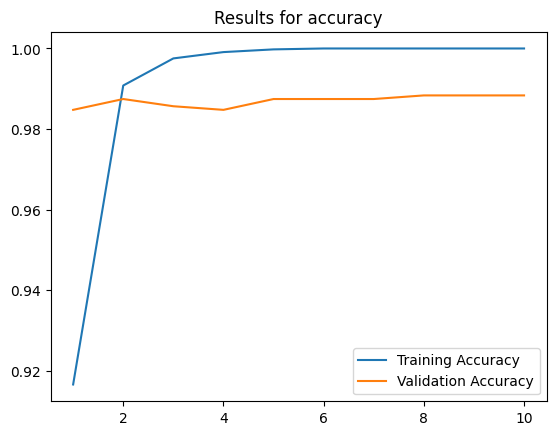

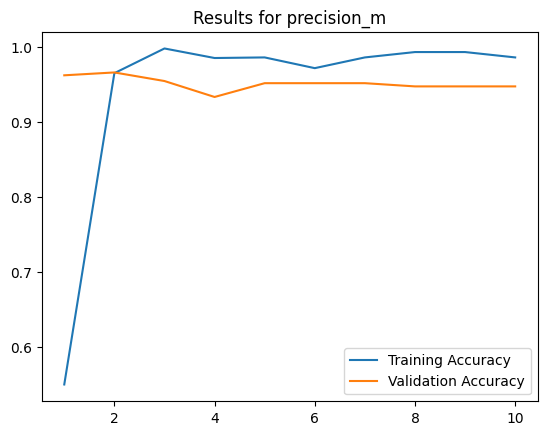

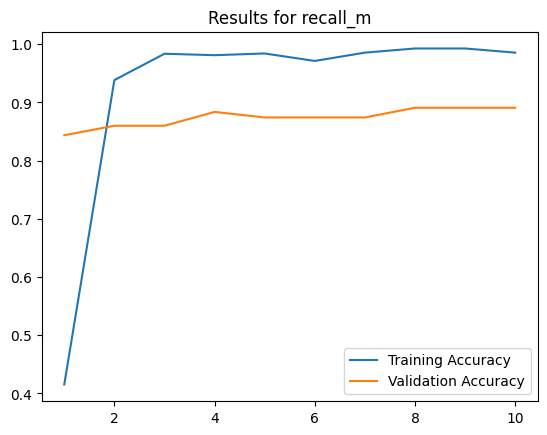

In [21]:
# Plot basic evaluation metrics across epochs
import matplotlib.pyplot as plt
%matplotlib inline

for i in ['accuracy', 'precision_m', 'recall_m']:
    acc = history.history[i]
    val_acc = history.history['val_{}'.format(i)]
    epochs = range(1, len(acc) + 1)

    plt.figure()
    plt.plot(epochs, acc, label='Training Accuracy')
    plt.plot(epochs, val_acc, label='Validation Accuracy')
    plt.title('Results for {}'.format(i))
    plt.legend()
    plt.show()